# Introduction Simpson's Paradox

Simpson's paradox occurs when trends that are present when data is separated into groups reverse when the data is aggregated. In this notebook, we take a look at four simple examples of Simpson's Paradox both quantitatively and visually. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.DataFrame({'city': ['Lewiston','River Heights','Lewiston','River Heights'], 'num_residents':[35,70,66,33], 'degree':['PhD','PhD','no PhD','no PhD'], 'num_friends':[109,223,719,442]})
data = data[['city','num_residents','degree','num_friends']]
data['avg_num_friends'] = round(data.num_friends / data.num_residents, 1)
display(data)

bycity = data.groupby('city').agg({'num_residents':'sum','num_friends':'sum'})
bycity['avg_num_friends'] = round(bycity.num_friends / bycity.num_residents, 1)
bycity



,city,num_residents,degree,num_friends,avg_num_friends
0,Lewiston,35,PhD,109,3.1
1,River Heights,70,PhD,223,3.2
2,Lewiston,66,no PhD,719,10.9
3,River Heights,33,no PhD,442,13.4


,num_residents,num_friends,avg_num_friends
city,,,
Lewiston,101,828,8.2
River Heights,103,665,6.5


You can reason about it in this way: River Heights is more educated, and educated people are not as friendly, so Lewiston ends up being the more friendly town.

# Other examples of Simpson's Paradox

# Medicine A vs Medicine B

In this example, X is better for both males and females, but performs worse overall! This is due to different sample sizes of males and females receiving each treatment.

In [2]:
data = pd.DataFrame({'X Better': [125, 22], 'X Treated': [610, 75], 'Y Better': [29, 60], 'Y Treated': [150, 240]}, index = ["M", "F"])
data['X Percent'] = data['X Better'] / data['X Treated']
data['Y Percent'] = data['Y Better'] / data['Y Treated']
data

,X Better,X Treated,Y Better,Y Treated,X Percent,Y Percent
M,125,610,29,150,0.204918,0.193333
F,22,75,60,240,0.293333,0.250000


In [3]:
data.loc['combined', :4] = list(data.iloc[:, :4].sum())
data.loc['combined', 'X Percent'] = data.loc['combined', 'X Better'] / data.loc['combined', 'X Treated']
data.loc['combined', 'Y Percent'] = data.loc['combined', 'Y Better'] / data.loc['combined', 'Y Treated']
data

,X Better,X Treated,Y Better,Y Treated,X Percent,Y Percent
M,125.0,610.0,29.0,150.0,0.204918,0.193333
F,22.0,75.0,60.0,240.0,0.293333,0.250000
combined,147.0,685.0,89.0,390.0,0.214599,0.228205


# Restaurant Reviews

In this example, Carlo's Restaurant is recommended by a higher percentage of both males and females, but is recommended by a lower overall percentage of respondents. This again occurs because of mismatched sample sizes. 

In [4]:
data = pd.DataFrame({"Recommend Sophia's": [50, 200], "Sophia's Total": [150, 250], "Recommend Carlo's": [180, 36], "Carlo's Total": [360, 40]}, index = ["M", "F"])
data["Sophia\'s Percent"] = data["Recommend Sophia's"] / data["Sophia's Total"]
data["Carlo's Percent"] = data["Recommend Carlo's"] / data["Carlo's Total"]
data

,Carlo's Total,Recommend Carlo's,Recommend Sophia's,Sophia's Total,Sophia's Percent,Carlo's Percent
M,360,180,50,150,0.333333,0.5
F,40,36,200,250,0.800000,0.9


In [5]:
data.loc['combined', :4] = list(data.iloc[:, :4].sum())
data.loc['combined', "Sophia's Percent"] = data.loc['combined', "Recommend Sophia's"] / data.loc['combined', "Sophia's Total"]
data.loc['combined', "Carlo's Percent"] = data.loc['combined', "Recommend Carlo's"] / data.loc['combined', "Carlo's Total"]
data

,Carlo's Total,Recommend Carlo's,Recommend Sophia's,Sophia's Total,Sophia's Percent,Carlo's Percent
M,360.0,180.0,50.0,150.0,0.333333,0.50
F,40.0,36.0,200.0,250.0,0.800000,0.90
combined,400.0,216.0,250.0,400.0,0.625000,0.54


# Correlation Reversal: Hours of Exercise vs Chance of Developing Disease

This is another fictional example showing Simpson's Paradox in the context of a correlation reversal. When looking at the data individually, there is a negative correlation between hours of exercise and chance of developing a disease, but when aggregating the data, the correlation reverses! This is due to the presence of another cause, age, on the chance of developing a disease. In order to determine the effect of exercise on the probability of disease, we need to control for the age of patients. 

In [6]:
from numpy.polynomial.polynomial import polyfit

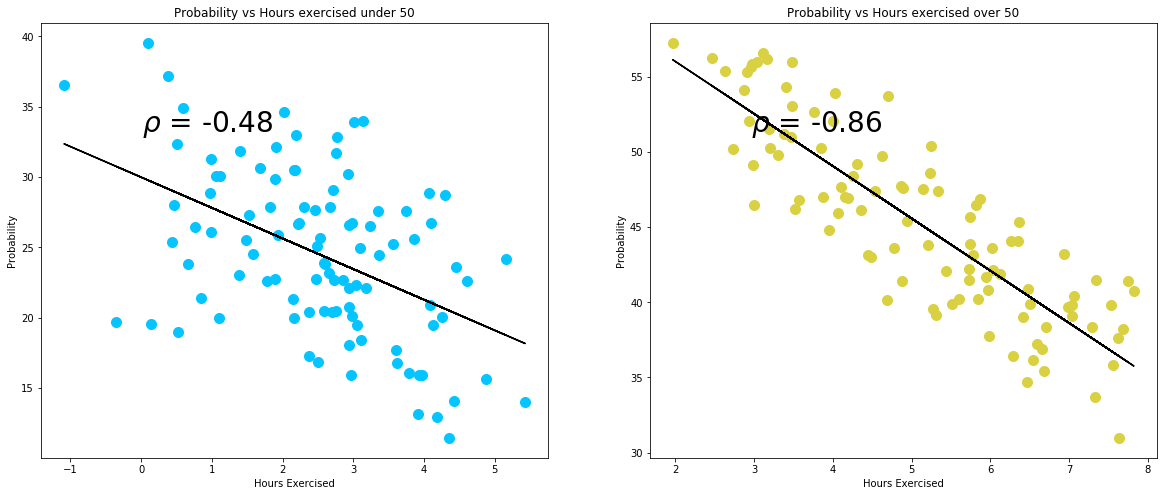

In [7]:
n_samples = 100
np.random.seed(42)
ages = np.random.randint(20, 50, n_samples)
hours = np.random.randint(1, 5, n_samples) + np.random.randn(n_samples)
p = 12 + 0.5 * ages + -2.1 * hours + np.random.randn(n_samples) *  2
under_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})

n_samples = 100
ages = np.random.randint(50, 85, n_samples)
hours = np.random.randint(3, 8, n_samples) + np.random.randn(n_samples) * 0.5
p = 40 + 0.32 * ages + -3.2 * hours + np.random.randn(n_samples) 
over_50 = pd.DataFrame({'age': ages, 'Hours Exercised': hours, 'probability': p})


def plot_relationship(data, c, color, ax):
    """Plot a scatter plot with linear fit"""
    x, y = np.array(data[c]), np.array(data['probability'])
    # Linear fit (polynomial of degree 1)
    b, m = polyfit(x, y, 1)
    # Plot scatterplot
    data.plot(x = c, y = 'probability', c = color, 
              style = 'o', legend = None, ax = ax, ms = 10)
    # Plot linear fit
    ax.plot(x, m * x + b, '-', color = 'k');
    if color == '#d9d142':
        plt.title(f'Probability vs {c.capitalize()} over 50')
    elif color == '#04c5ff':
        plt.title(f'Probability vs {c.capitalize()} under 50')
    else:
        plt.title(f'Probability vs {c.capitalize()} Combined')
    corr_coef = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    plt.ylabel('Probability'); 
    plt.text(0.2, 0.75, r'$\rho$ = ' + f'{round(corr_coef, 2)}', fontsize = 28, color = 'k', 
             transform=ax.transAxes)

    
plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 2, 1)
plot_relationship(under_50, 'Hours Exercised', '#04c5ff', ax)
ax = plt.subplot(1, 2, 2)
plot_relationship(over_50, 'Hours Exercised', '#d9d142', ax)

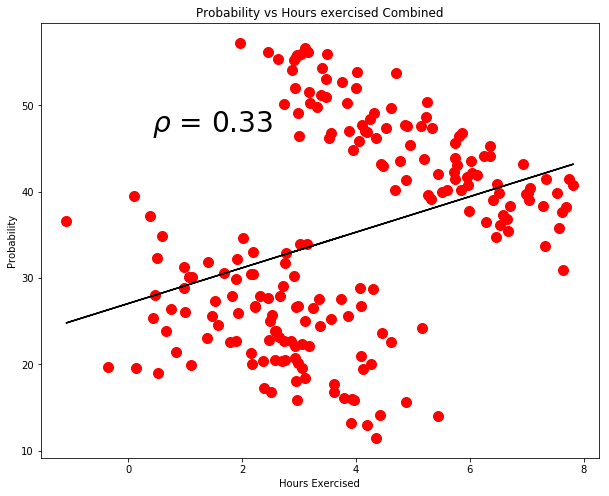

In [8]:
plt.figure(figsize = (10, 8))
combined = pd.concat([under_50, over_50], axis = 0)
ax = plt.subplot(1, 1, 1)
plot_relationship(combined, 'Hours Exercised', 'r', ax)

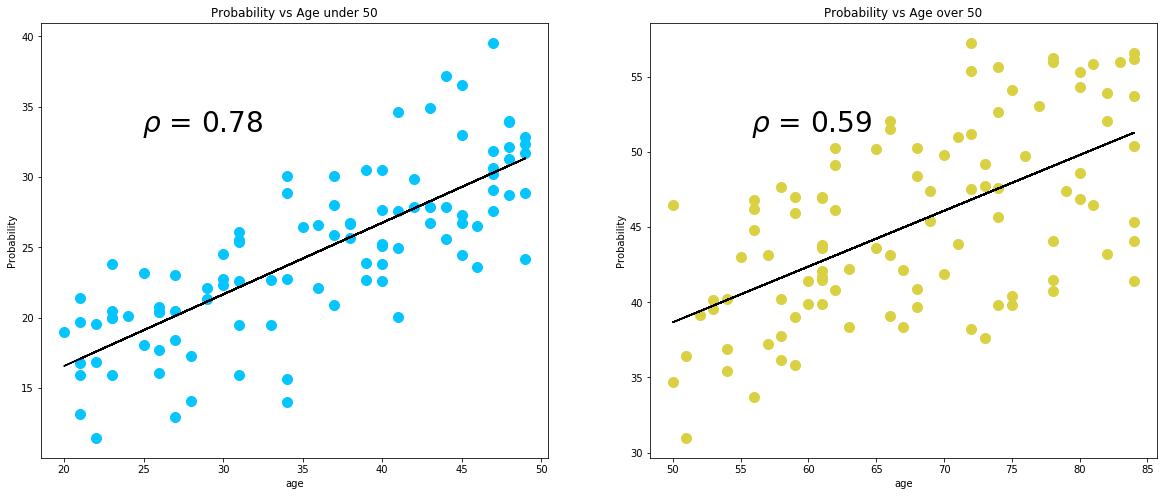

In [9]:
plt.figure(figsize = (20, 8))
ax = plt.subplot(1, 2, 1)
plot_relationship(under_50, 'age', '#04c5ff', ax)
ax = plt.subplot(1, 2, 2)
plot_relationship(over_50, 'age', '#d9d142', ax)

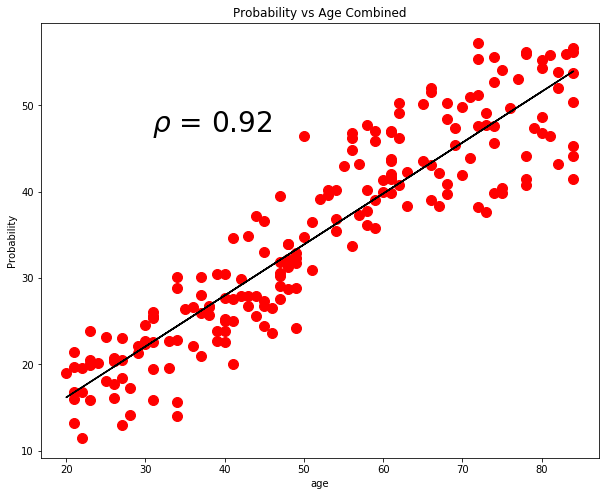

In [10]:
plt.figure(figsize = (10, 8))
ax = plt.subplot(1, 1, 1)
plot_relationship(combined, 'age', 'r', ax)

In [11]:
colors = [ '#04c5ff' for _ in range(n_samples)]
colors.extend(['#d9d142' for _ in range(n_samples)])

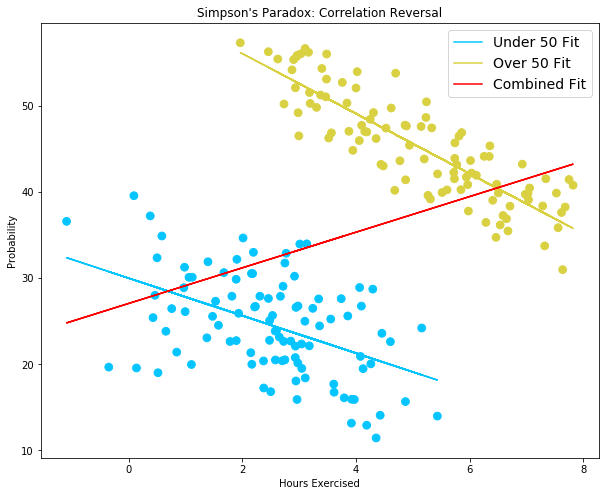

In [12]:
plt.figure(figsize = (10, 8))

plt.scatter(combined['Hours Exercised'],
            combined['probability'], c = colors, label = None, s = 60);

x_c, y_c = np.array(combined['Hours Exercised']), np.array(combined['probability'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(under_50['Hours Exercised']), np.array(under_50['probability'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(over_50['Hours Exercised']), np.array(over_50['probability'])
b_o, m_o = polyfit(over_50['Hours Exercised'], over_50['probability'], 1)

plt.plot(x_u, b_u + m_u * x_u, c =  '#04c5ff', label = 'Under 50 Fit');
plt.plot(x_o, b_o + m_o * x_o, c = '#d9d142', label = 'Over 50 Fit');
plt.plot(x_c, b_c + m_c * x_c, c = 'r', label = 'Combined Fit');
plt.xlabel('Hours Exercised');
plt.ylabel('Probability'); plt.title("Simpson's Paradox: Correlation Reversal");
plt.legend(prop = {'size': 14});

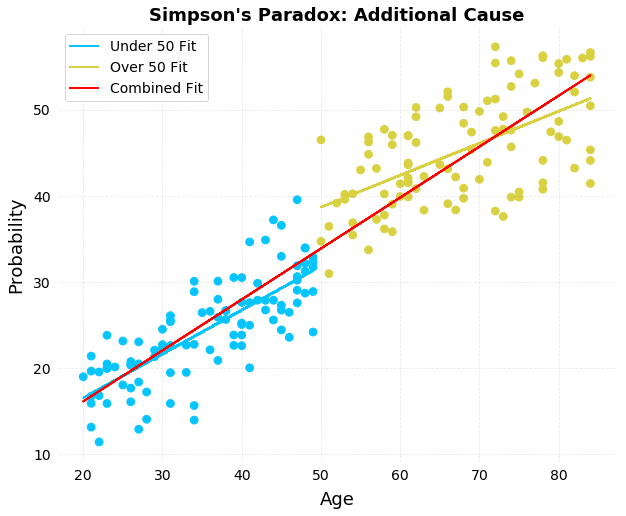

In [13]:
plt.figure(figsize = (10, 8))

plt.scatter(combined['age'],
            combined['probability'], c = colors, label = None, s = 60);

x_c, y_c = np.array(combined['age']), np.array(combined['probability'])
b_c, m_c = polyfit(x_c, y_c, 1)

x_u, y_u = np.array(under_50['age']), np.array(under_50['probability'])
b_u, m_u = polyfit(x_u, y_u, 1)

x_o, y_o = np.array(over_50['age']), np.array(over_50['probability'])
b_o, m_o = polyfit(over_50['age'], over_50['probability'], 1)

plt.plot(x_u, b_u + m_u * x_u, c =  '#04c5ff', label = 'Under 50 Fit');
plt.plot(x_o, b_o + m_o * x_o, c = '#d9d142', label = 'Over 50 Fit');
plt.plot(x_c, b_c + m_c * x_c, c = 'r', label = 'Combined Fit');
plt.xlabel('Age');
plt.ylabel('Probability'); plt.title("Simpson's Paradox: Additional Cause");
plt.legend(prop = {'size': 14});

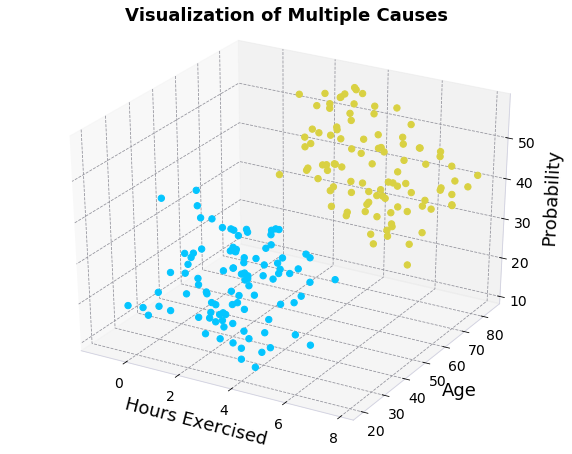

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')


markers = ['.' for _ in range(100)]
markers.extend('o' for _ in range(100))

x_c = np.array(combined['Hours Exercised'])
y_c = np.array(combined['age'])
z_c = np.array(combined['probability'])
ax.scatter(x_c, y_c, z_c, c=colors, s = 40, marker='o', alpha = 1.0)

ax.set_xlabel('Hours Exercised')
ax.set_ylabel('Age')
ax.set_zlabel('Probability');
ax.set_title('Visualization of Multiple Causes', y = 1.05);

# Conclusions

Simpson's Paradox is an intriguing statistical phenomenon that demonstrates the importance of thinking causally by asking why - determining the data generation process. Once we know how the data is generated, we can look for the other factors we are not being shown and resolve the paradox by either keeping the data separated, or aggregating the data.